In [1]:
function LagrangeInterpolantGenerator(xvals,yvals)
    function LagrangeInterpolant(x)
        N = length(xvals)
        LagrangePolynomials = ones(N)
        for i in 1:N  
            for j in [1:i-1;i+1:N]
                LagrangePolynomials[i] = LagrangePolynomials[i]*(x-xvals[j])/(xvals[i]-xvals[j])
            end
        end
        output = sum(LagrangePolynomials.*yvals)
        return output
    end
    return LagrangeInterpolant
end

LagrangeInterpolantGenerator (generic function with 1 method)

In [2]:
xs = 1:1:10
A = [rand() for x in xs]
l = LagrangeInterpolantGenerator(xs, A)

(::getfield(Main, Symbol("#LagrangeInterpolant#3")){StepRange{Int64,Int64},Array{Float64,1}}) (generic function with 1 method)

In [3]:
using Plots

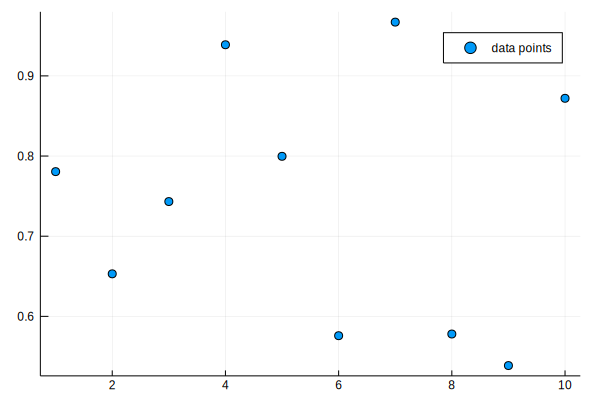

In [55]:
scatter(xs, A, label="data points")

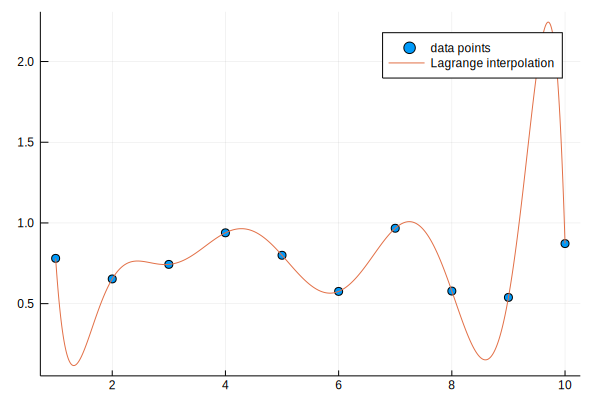

In [56]:
xsf = 1:0.01:10
B = [l(x) for x in xsf]
plot!(xsf, B, label="Lagrange interpolation")

In [57]:
function NewtonInterpolantGenerator(xvals, yvals)
    function divdiff(xs, f)
        n = length(xs)
        d = deepcopy(f)
        for i=2:n
            for j=1:i-1
                d[i] = (d[j] - d[i])/(xs[j] - xs[i])
            end
        end
        return d
    end
    
    function NewtonInterpolant(x)
        
        NewtonPolynomial = divdiff(xvals, yvals)
        N = length(NewtonPolynomial)
        for i in 2:N  
            for j in 1:i-1
                NewtonPolynomial[i] = NewtonPolynomial[i]*(x - xvals[j])
            end
        end
        output = sum(NewtonPolynomial)
        return output
    end
    return NewtonInterpolant
end

NewtonInterpolantGenerator (generic function with 1 method)

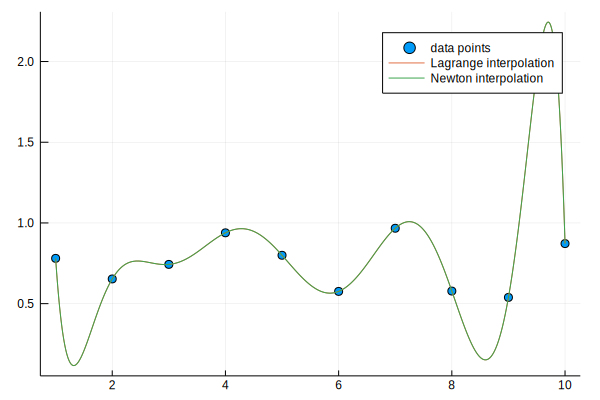

In [58]:
n = NewtonInterpolantGenerator(xs, A)
N = [n(x) for x in xsf]
plot!(xsf, N, label="Newton interpolation")

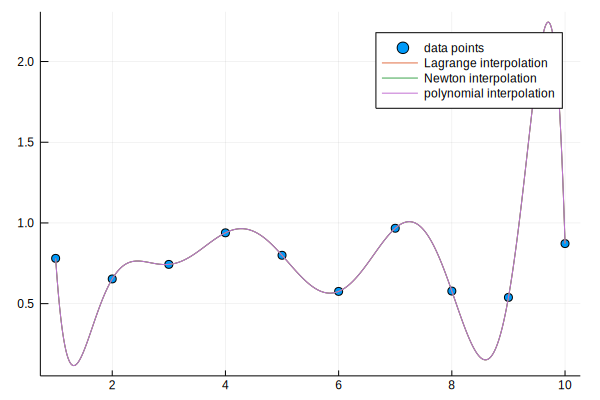

In [59]:
using Polynomials
fit1=polyfit(xs, A)
B=[fit1(x) for x in xsf]
poly_int = plot!(xsf,B, label="polynomial interpolation")

In [9]:
function test_methods(points)
    xs = 1:1:points
    ys = [rand() for x in xs]
    lagrange = @elapsed LagrangeInterpolantGenerator(xs, ys)
    newton = @elapsed NewtonInterpolantGenerator(xs, ys)
    julia = @elapsed polyfit(xs, ys)
    return  lagrange, newton, julia
end

test_methods (generic function with 1 method)

In [10]:
using DataFrames
function test_suite(range)
    results = DataFrame(Size = Int64[], Time = Float64[], Method = String[])
    for i in range
        for j in 1:10
            n, b, bl = test_methods(i)
            push!(results, [i, n, "Lagrange"])
            push!(results, [i, b, "Newton"])
            push!(results, [i, bl, "Polyfit"])
        end
    end
    results
end

┌ Info: Recompiling stale cache file /home/kamil/.julia/compiled/v1.0/DataFrames/AR9oZ.ji for DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1187


test_suite (generic function with 1 method)

In [11]:
using Statistics
data = test_suite(100:100:1000)
data = by(data, [:Size, :Method],  df->DataFrame(
        Mean=mean(df[:Time]), Deviation=std(df[:Time])))

,Size,Method,Mean,Deviation
,Int64,String,Float64,Float64
1,100,Lagrange,8.2e-8,6.19839e-8
2,100,Newton,5.84e-8,1.04265e-8
3,100,Polyfit,0.00186538,0.00489775
4,200,Lagrange,4.97e-8,7.00872e-9
5,200,Newton,5.65e-8,7.26101e-9
6,200,Polyfit,0.00110818,0.000105319
7,300,Lagrange,5.3e-8,9.83192e-9
8,300,Newton,5.76e-8,5.42013e-9
9,300,Polyfit,0.00324386,0.00269097


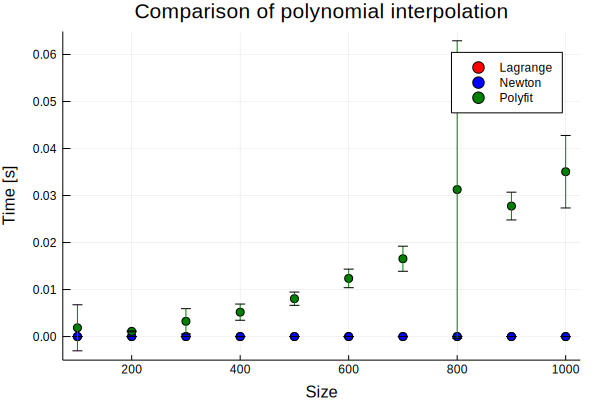

In [12]:
scatter(data[:Size], data[:Mean], group = data[:Method], yerr = data[:Deviation],
    colour = [:red :blue :green], label = data[:Method], 
    xlabel = "Size", ylabel = "Time [s]", title = "Comparison of polynomial interpolation")

In [13]:
function test_methods(points)
    xs = 1:1:points
    ys = [rand() for x in xs]
    xsf = 1:0.1:points
    l = LagrangeInterpolantGenerator(xs, ys)
    n = NewtonInterpolantGenerator(xs, ys)
    p = polyfit(xs, ys)
    
    lagrange = @elapsed [l(x) for x in xsf]
    newton = @elapsed [n(x) for x in xsf]
    julia = @elapsed [p(x) for x in xsf]
    return  lagrange, newton, julia
end

test_methods (generic function with 1 method)

In [14]:
function test_suite(range)
    results = DataFrame(Size = Int64[], Time = Float64[], Method = String[])
    for i in range
        for j in 1:10
            n, b, bl = test_methods(i)
            push!(results, [i, n, "Lagrange"])
            push!(results, [i, b, "Newton"])
            push!(results, [i, bl, "Polyfit"])
        end
    end
    results
end

test_suite (generic function with 1 method)

In [15]:
data = test_suite(1:10:200)
data = by(data, [:Size, :Method],  df->DataFrame(
        Mean=mean(df[:Time]), Deviation=std(df[:Time])))

,Size,Method,Mean,Deviation
,Int64,String,Float64,Float64
1,1,Lagrange,5.451e-7,3.89977e-7
2,1,Newton,0.00296851,0.00937798
3,1,Polyfit,2.65e-7,3.05542e-7
4,11,Lagrange,0.000262716,1.89692e-5
5,11,Newton,0.00024262,3.71504e-6
6,11,Polyfit,4.0345e-6,9.23088e-7
7,21,Lagrange,0.0032375,0.00444138
8,21,Newton,0.00128349,3.12607e-5
9,21,Polyfit,1.967e-5,1.88095e-7


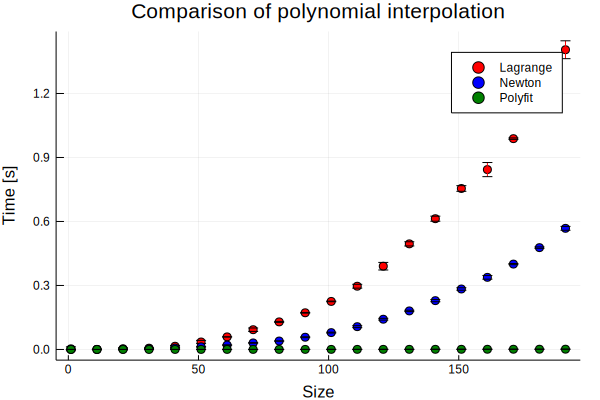

In [16]:
scatter(data[:Size], data[:Mean], group = data[:Method], yerr = data[:Deviation],
    colour = [:red :blue :green], label = data[:Method], 
    xlabel = "Size", ylabel = "Time [s]", title = "Comparison of polynomial interpolation")

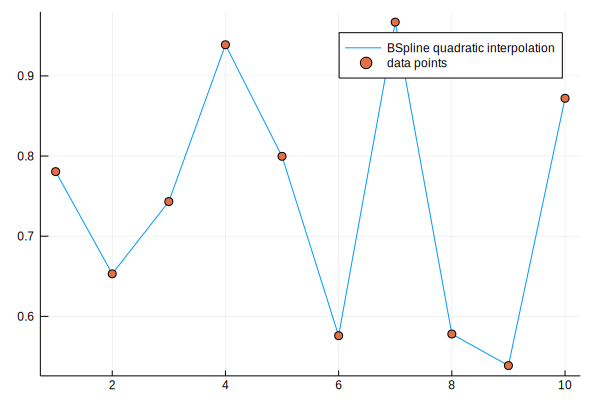

In [24]:
using Interpolations
itp = interpolate(A, BSpline(Linear()))
B=[itp(x) for x in xsf]
plot(xsf,B, label="BSpline quadratic interpolation")
scatter!(xs,A, label="data points")

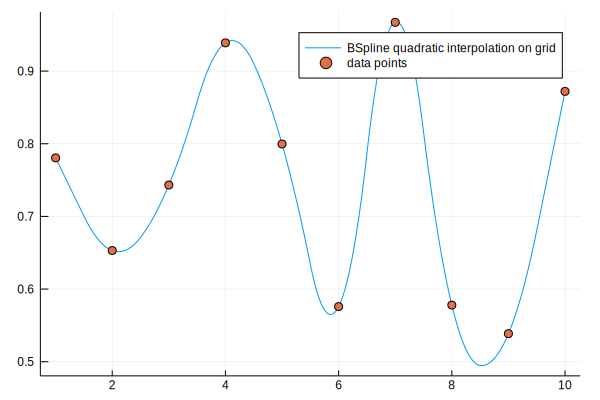

In [60]:
itp = interpolate(A, BSpline(Quadratic(Line(OnGrid()))))
B=[itp(x) for x in xsf]
plot(xsf,B, label="BSpline quadratic interpolation on grid")
scatter!(xs,A, label="data points")

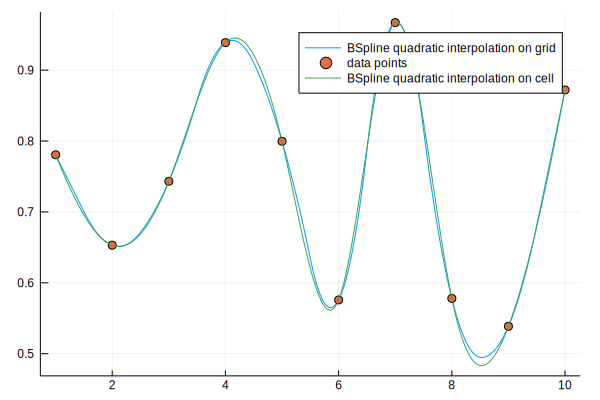

In [61]:
itp = interpolate(A, BSpline(Cubic(Line(OnCell()))))
B=[itp(x) for x in xsf]
plot!(xsf,B, label="BSpline quadratic interpolation on cell")

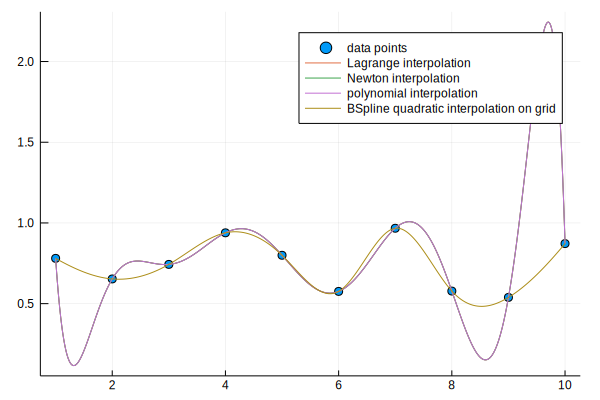

In [62]:
plot(poly_int)
plot!(xsf, B, label="BSpline quadratic interpolation on grid")